In [1]:
 def set_plot_param():
    """Set my own customized plotting parameters"""
    mpl.rc('axes', edgecolor='grey')
    mpl.rc('axes', labelcolor='black')
    mpl.rc('xtick', color='black')
    mpl.rc('xtick', labelsize=12)
    mpl.rc('ytick', color='black')
    mpl.rc('ytick', labelsize=12)
    mpl.rc('axes', titlesize=18)
    mpl.rc('axes', labelsize=12)
    mpl.rc('legend', fontsize='large')
    mpl.rc('text', color='black')

In [13]:
# relative loss in species richness globally 
import os
import pickle
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd


# Displaying the created weights fo
# Specify the output directory
output_dir = "/storage/workspaces/wa_climate/climate_trt/chari/intermediate_results/"

# List of taxa, SDMs, and GCMs
taxas = ["Mammals","Bird","Amphibians"]
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']

scenarios = ["rcp26", "rcp60"]  # Add rcp26 to the scenarios

time = '65'
time_ind=65
year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

mean_newvalue_hist= {}
mean_newvalue_fut = {}
mean_sumbin_hist = {}
mean_sumbin_fut = {}
    
mean_over_sdms_gcms_hist = {}
mean_over_sdms_gcms_fut = {}
mean_over_sdms_gcms_sumbin_hist = {}
mean_over_sdms_gcms_sumbin_fut = {}

mean_over_all_sdms_gcms_hist = {}
mean_over_all_sdms_gcms_fut = {}
mean_over_all_sdms_gcms_sumbin_hist = {}
mean_over_all_sdms_gcms_sumbin_fut = {}

for scenario in scenarios:
    mean_over_sdms_gcms_hist[scenario] = {}
    mean_over_sdms_gcms_fut[scenario] = {}
    mean_over_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_over_all_sdms_gcms_hist[scenario] = {}
    mean_over_all_sdms_gcms_fut[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_newvalue_hist[scenario] = {}
    mean_newvalue_fut[scenario] = {}
    mean_sumbin_hist[scenario] = {}
    mean_sumbin_fut[scenario] = {}
    
    dataarrays_sdms_newvalue_hist = []
    dataarrays_sdms_newvalue_fut = []
    dataarrays_sdms_sumbin_hist = []
    dataarrays_sdms_sumbin_fut = []
    

    
    for taxa in taxas:
        # Initialize taxa-level lists
        dataarrays_sdms_newvalue_hist = []
        dataarrays_sdms_newvalue_fut = []
        dataarrays_sdms_sumbin_hist = []
        dataarrays_sdms_sumbin_fut = []
        mean_newvalue_hist[scenario][taxa] = {}
        mean_newvalue_fut[scenario][taxa] = {}
        mean_sumbin_hist[scenario][taxa] = {}
        mean_sumbin_fut[scenario][taxa] = {}
        
        mean_over_sdms_gcms_hist[scenario][taxa] = {}
        mean_over_sdms_gcms_fut[scenario][taxa] = {}
        mean_over_sdms_gcms_sumbin_hist[scenario][taxa] = {}
        mean_over_sdms_gcms_sumbin_fut[scenario][taxa] = {}

        mean_over_all_sdms_gcms_hist[scenario][taxa] = {}
        mean_over_all_sdms_gcms_fut[scenario][taxa] = {}
        mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa] = {}
        mean_over_all_sdms_gcms_sumbin_fut[scenario] [taxa]= {}

        for sdm in sdms:
            mean_newvalue_hist[scenario][taxa][sdm] = {}
            mean_newvalue_fut[scenario][taxa][sdm] = {}
            mean_sumbin_hist[scenario][taxa][sdm] = {}
            mean_sumbin_fut[scenario][taxa][sdm] = {}

            dataarrays_newvalue_hist = []
            dataarrays_newvalue_fut = []
            dataarrays_sumbin_hist = []
            dataarrays_sumbin_fut = []

            for gcm in gcms:
                mean_newvalue_hist[scenario][taxa][sdm][gcm] = {}
                mean_newvalue_fut[scenario][taxa][sdm][gcm] = {}
                mean_sumbin_hist[scenario][taxa][sdm][gcm] = {}
                mean_sumbin_fut[scenario][taxa][sdm][gcm] = {}

                sum_newvalue_hist = None
                sum_newvalue_future = None
                sum_sumbin_hist = None
                sum_sumbin_future = None

                # Load pickle files
                newvalue_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4_newbase.pkl")
                newvalue_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4_newbase.pkl")
                sum_bin_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4.pkl")
                sum_bin_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4.pkl")

                with open(newvalue_hist_sum_path, "rb") as f:
                    newvalue_hist_taxa =  pd.read_pickle(f)

                with open(newvalue_future_sum_path, "rb") as f:
                    newvalue_future_taxa =  pd.read_pickle(f)

                with open(sum_bin_hist_sum_path, "rb") as f:
                    sum_bin_hist_taxa =  pd.read_pickle(f)

                with open(sum_bin_future_sum_path, "rb") as f:
                    sum_bin_future_taxa =  pd.read_pickle(f)
                    
                weights_newvalue = np.cos(np.deg2rad(newvalue_hist_taxa.lat))
                weights_newvalue.name = "weights"

                    
                # Assign the summed values to your dictionary
                mean_newvalue_hist[scenario][taxa][sdm][gcm] = newvalue_hist_taxa
                mean_newvalue_fut[scenario][taxa][sdm][gcm] = newvalue_future_taxa
                mean_sumbin_hist[scenario][taxa][sdm][gcm] = sum_bin_hist_taxa
                mean_sumbin_fut[scenario][taxa][sdm][gcm] = sum_bin_future_taxa

                dataarrays_newvalue_hist.append(mean_newvalue_hist[scenario][taxa][sdm][gcm])
                dataarrays_newvalue_fut.append(mean_newvalue_fut[scenario][taxa][sdm][gcm])
                dataarrays_sumbin_hist.append(mean_sumbin_hist[scenario][taxa][sdm][gcm])
                dataarrays_sumbin_fut.append(mean_sumbin_fut[scenario][taxa][sdm][gcm])

            # Concatenate and calculate the mean over the new dimension
            mean_over_sdms_gcms_hist[scenario][taxa][sdm] = xr.concat(dataarrays_newvalue_hist, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
            mean_over_sdms_gcms_fut[scenario][taxa][sdm] = xr.concat(dataarrays_newvalue_fut, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
            mean_over_sdms_gcms_sumbin_hist[scenario][taxa][sdm] = xr.concat(dataarrays_sumbin_hist, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
            mean_over_sdms_gcms_sumbin_fut[scenario][taxa][sdm] = xr.concat(dataarrays_sumbin_fut, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')

                   # Append the mean DataArrays across GCMs to the SDM lists
            dataarrays_sdms_newvalue_hist.append(mean_over_sdms_gcms_hist[scenario][taxa][sdm])
            dataarrays_sdms_newvalue_fut.append(mean_over_sdms_gcms_fut[scenario][taxa][sdm])
            dataarrays_sdms_sumbin_hist.append(mean_over_sdms_gcms_sumbin_hist[scenario][taxa][sdm])
            dataarrays_sdms_sumbin_fut.append(mean_over_sdms_gcms_sumbin_fut[scenario][taxa][sdm])

        # Concatenate and calculate the mean over SDMs
        mean_over_all_sdms_gcms_hist[scenario][taxa] = xr.concat(dataarrays_sdms_newvalue_hist, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
        mean_over_all_sdms_gcms_fut[scenario][taxa] = xr.concat(dataarrays_sdms_newvalue_fut, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
        mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa] = xr.concat(dataarrays_sdms_sumbin_hist, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
        mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa] = xr.concat(dataarrays_sdms_sumbin_fut, dim='sdm').weighted(weights_newvalue).mean(dim='sdm') 



In [3]:
ncfname_ssp126 = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126.nc"

da_landuse_ssp126 = xr.open_dataset(ncfname_ssp126, decode_times=False)
land_mask=da_landuse_ssp126["primf"].isel(time=0)


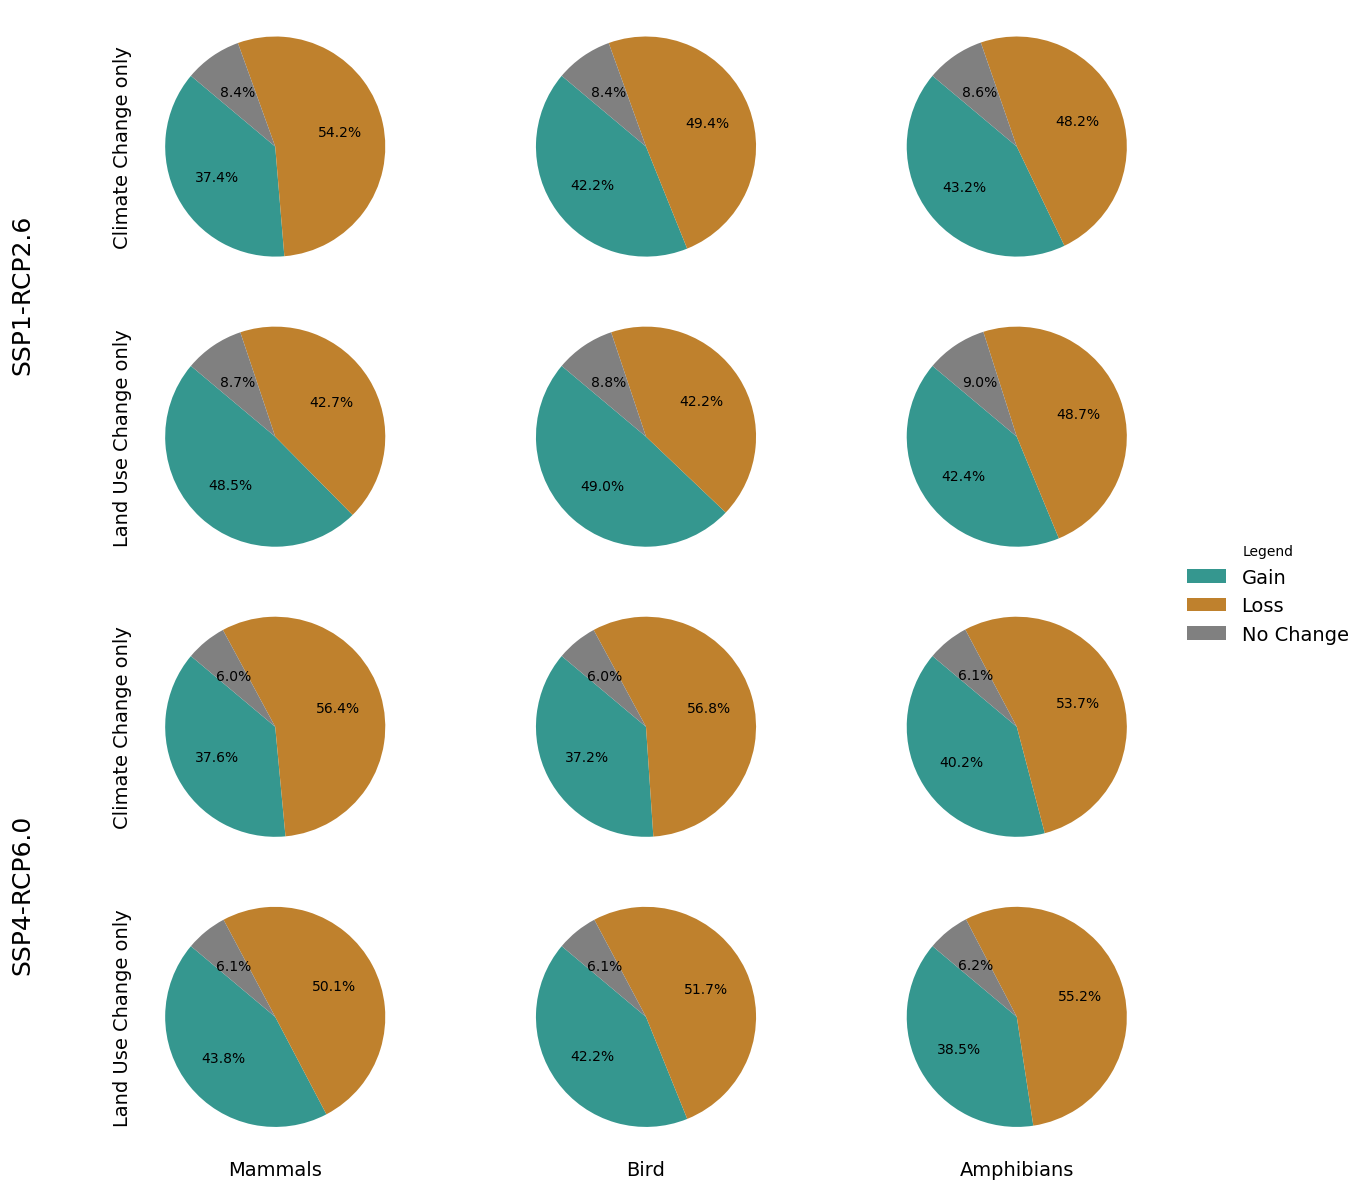

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr  # Assuming xarray is being used for data manipulation
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
set_plot_param()
# Example colors for the pie chart segments
  # Climate Change: Gain, Loss, No Change
colors =[ '#35978f', '#bf812d', 'grey']  # Land Use Change: Gain, Loss, No Change
labels = ['Gain', 'Loss', 'No Change']
taxas = ["Mammals", "Bird", "Amphibians"]
scenarios = ["rcp26", "rcp60"]  # Updated scenario names for clarity

num_scenarios = len(scenarios)
num_taxas = len(taxas)
num_rows = num_scenarios * 2  # Two rows per scenario: one for CC and one for LUC
num_cols = num_taxas  # One column per taxa

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12,12))  # Adjust figsize as needed



for j, scenario in enumerate(scenarios):
    for i, taxa in enumerate(taxas):
        # Example data manipulation and calculations for portions
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa].where(land_mask>=0)
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa].where(land_mask>=0)
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa].where(land_mask>=0)
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa].where(land_mask>=0)
        
        
        EARTH_RADIUS = 6371000  # Earth's radius in meters
        # Assuming 'newvalue_future' and others are xarray DataArrays with 'lat' and 'lon' dimensions
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))
        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))/ 1e12

        
        gain_area_cc = xr.where(newvalue_future > newvalue_hist, cell_area, 0).sum().item()  # Convert to km²

           
        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        
        gain_area_luc = xr.where(luc_fut > luc_hist, cell_area,0).sum().item()
        no_change_area = xr.where((sumbin_future-newvalue_future) == (sumbin_hist-newvalue_hist), cell_area, 0).sum().item()
        
        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        loss_area_cc = xr.where(newvalue_future < newvalue_hist, cell_area, 0).sum().item() # Convert to km²
        loss_area_luc = xr.where(luc_fut < luc_hist, cell_area,0).sum().item() 
        
        
        portions = [gain_area_luc,
                    loss_area_luc ,
                    no_change_area  ]
        # Climate Change (CC) pie chart for scenario
        ax_cc = axes[j*2, i]  # Even row indices for Climate Change
        ax_cc.pie([gain_area_cc, loss_area_cc, no_change_area], colors=colors, autopct='%1.1f%%', startangle=140)
        if i == 0:  # Only set the label for the first column
            ax_cc.set_ylabel('Climate Change only',fontsize=14)
        

        # Land Use Change (LUC) pie chart for scenario
        ax_luc = axes[j*2 + 1, i]  # Odd row indices for Land Use Change
        ax_luc.pie([gain_area_luc, loss_area_luc, no_change_area], colors=colors, autopct='%1.1f%%', startangle=140)

        
        if i == 0:  # Only set the label for the first column
            ax_luc.set_ylabel('Land Use Change only',fontsize=14)
        if j == 1:
            ax_luc.set_xlabel(f'{taxa}',fontsize=14)
            

fig.text(-0.02, 0.75, 'SSP1-RCP2.6', ha='center', va='center', fontsize=18, rotation='vertical')
fig.text(-0.02, 0.25, 'SSP4-RCP6.0', ha='center', va='center', fontsize=18, rotation='vertical')

# Legend for the whole figure
fig.legend(colors , labels=labels , loc='center right',  bbox_to_anchor=(1.1, 0.5),title='Legend', frameon=False,fontsize=14)
plt.tight_layout()







In [5]:
import matplotlib as mpl
def set_plot_param():
    mpl.rc('axes',edgecolor='grey')
    mpl.rc('axes',labelcolor='black')
    mpl.rc('xtick',color='black')
    mpl.rc('xtick',labelsize=14)
    mpl.rc('ytick',color='black')
    mpl.rc('ytick',labelsize=14)
    mpl.rc('axes',titlesize=18)
    mpl.rc('axes',labelsize=14)
    mpl.rc('legend',fontsize='large')
    mpl.rc('text',color='black')    

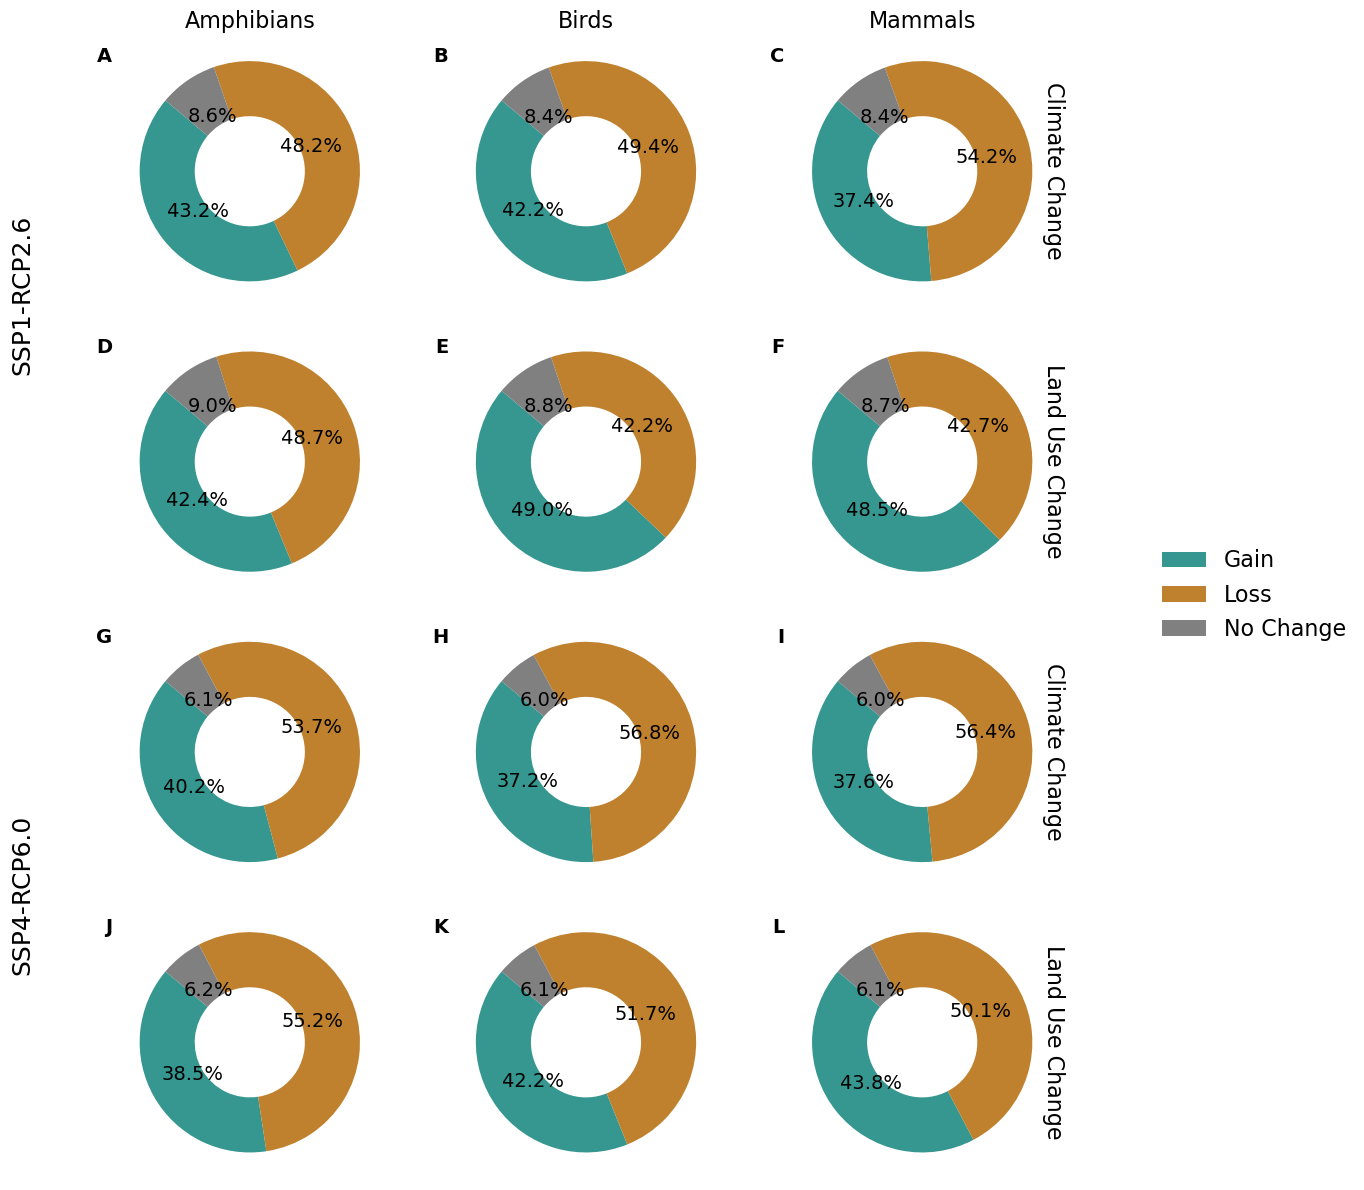

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr  # Assuming xarray is being used for data manipulation
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
# Assuming set_plot_param() is defined elsewhere

# Example colors for the doughnut chart segments
colors =[ '#35978f', '#bf812d', 'grey']
labels = ['Gain', 'Loss', 'No Change']
taxas = ["Amphibians", "Bird", "Mammals"]

taxa_indices = {"Mammals": "Mammals", "Bird": "Birds", "Amphibians": "Amphibians"}
scenarios = ["rcp26", "rcp60"]  # Updated scenario names for clarity
num_scenarios = len(scenarios)
num_taxas = len(taxas)
num_rows = num_scenarios * 2  # Two rows per scenario: one for CC and one for LUC
num_cols = num_taxas  # One column per taxa
subplot_labels = ['A', 'B','C','G','H','I']
subplot_labels_luc = ['D', 'E','F','J','K','L']


fig, axes = plt.subplots(num_rows, num_cols, figsize=(12,12))  # Adjust figsize as needed

# Define the width of the doughnut. Smaller values = thicker doughnuts
doughnut_width = 0.5
label_index = 0 

for j, scenario in enumerate(scenarios):
    for i, taxa in enumerate(taxas):
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa].where(land_mask>=0)
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa].where(land_mask>=0)
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa].where(land_mask>=0)
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa].where(land_mask>=0)
        
        
        EARTH_RADIUS = 6371000  # Earth's radius in meters
        # Assuming 'newvalue_future' and others are xarray DataArrays with 'lat' and 'lon' dimensions
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))
        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))/ 1e12

        
        gain_area_cc = xr.where(newvalue_future > newvalue_hist, cell_area, 0).sum().item()  # Convert to km²

           
        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        
        gain_area_luc = xr.where(luc_fut > luc_hist, cell_area,0).sum().item()
        no_change_area = xr.where((sumbin_future-newvalue_future) == (sumbin_hist-newvalue_hist), cell_area, 0).sum().item()
        
        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        loss_area_cc = xr.where(newvalue_future < newvalue_hist, cell_area, 0).sum().item() # Convert to km²
        loss_area_luc = xr.where(luc_fut < luc_hist, cell_area,0).sum().item() 
        
        

        # Doughnut plots
        ax_cc = axes[j*2, i]  # Even row indices for Climate Change
        ax_cc.pie([gain_area_cc, loss_area_cc, no_change_area], colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=doughnut_width),textprops=dict(color='black',  fontsize=14))
        if i == 2:  # Only set the label for the first column
            ax_cc.set_ylabel('Climate Change', fontsize=16, rotation=-90)
            ax_cc.yaxis.set_label_position("right")  #
  # Po)

        ax_luc = axes[j*2 + 1, i]  # Odd row indices for Land Use Change
        ax_luc.pie([gain_area_luc, loss_area_luc, no_change_area], colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=doughnut_width), textprops=dict(color='black',  fontsize=14))
        if i == 2:  # Only set the label for the first column
            ax_luc.set_ylabel('Land Use Change', fontsize=16,  rotation=-90)
            ax_luc.yaxis.set_label_position("right")
        if j == 0:
            ax_cc.set_xlabel(f'{taxa_indices[taxa]}', fontsize=16)
            ax_cc.xaxis.set_label_position("top")
            
            
        ax_cc.text(0, 0.95, subplot_labels[label_index], transform=ax_cc.transAxes, fontsize=14, weight='semibold', va='top', ha='right')
        ax_luc.text(0, 0.95, subplot_labels_luc[label_index], transform=ax_luc.transAxes, fontsize=14, weight='semibold', va='top', ha='right')

        label_index += 1  # Increment the counter


# Adjustments for SSP/RCP labels
fig.text(-0.02, 0.75, 'SSP1-RCP2.6', ha='center', va='center', fontsize=18, rotation='vertical')
fig.text(-0.02, 0.25, 'SSP4-RCP6.0', ha='center', va='center', fontsize=18, rotation='vertical')
set_plot_param()

# Legend for the whole figure
fig.legend(colors, labels=labels, loc='center right', bbox_to_anchor=(1.1, 0.5), frameon=False, fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 1])  

#plt.savefig("/storage/homefs/ch21o450/scripts/all_figures/Fig.2.5.png", dpi=300, bbox_inches='tight')

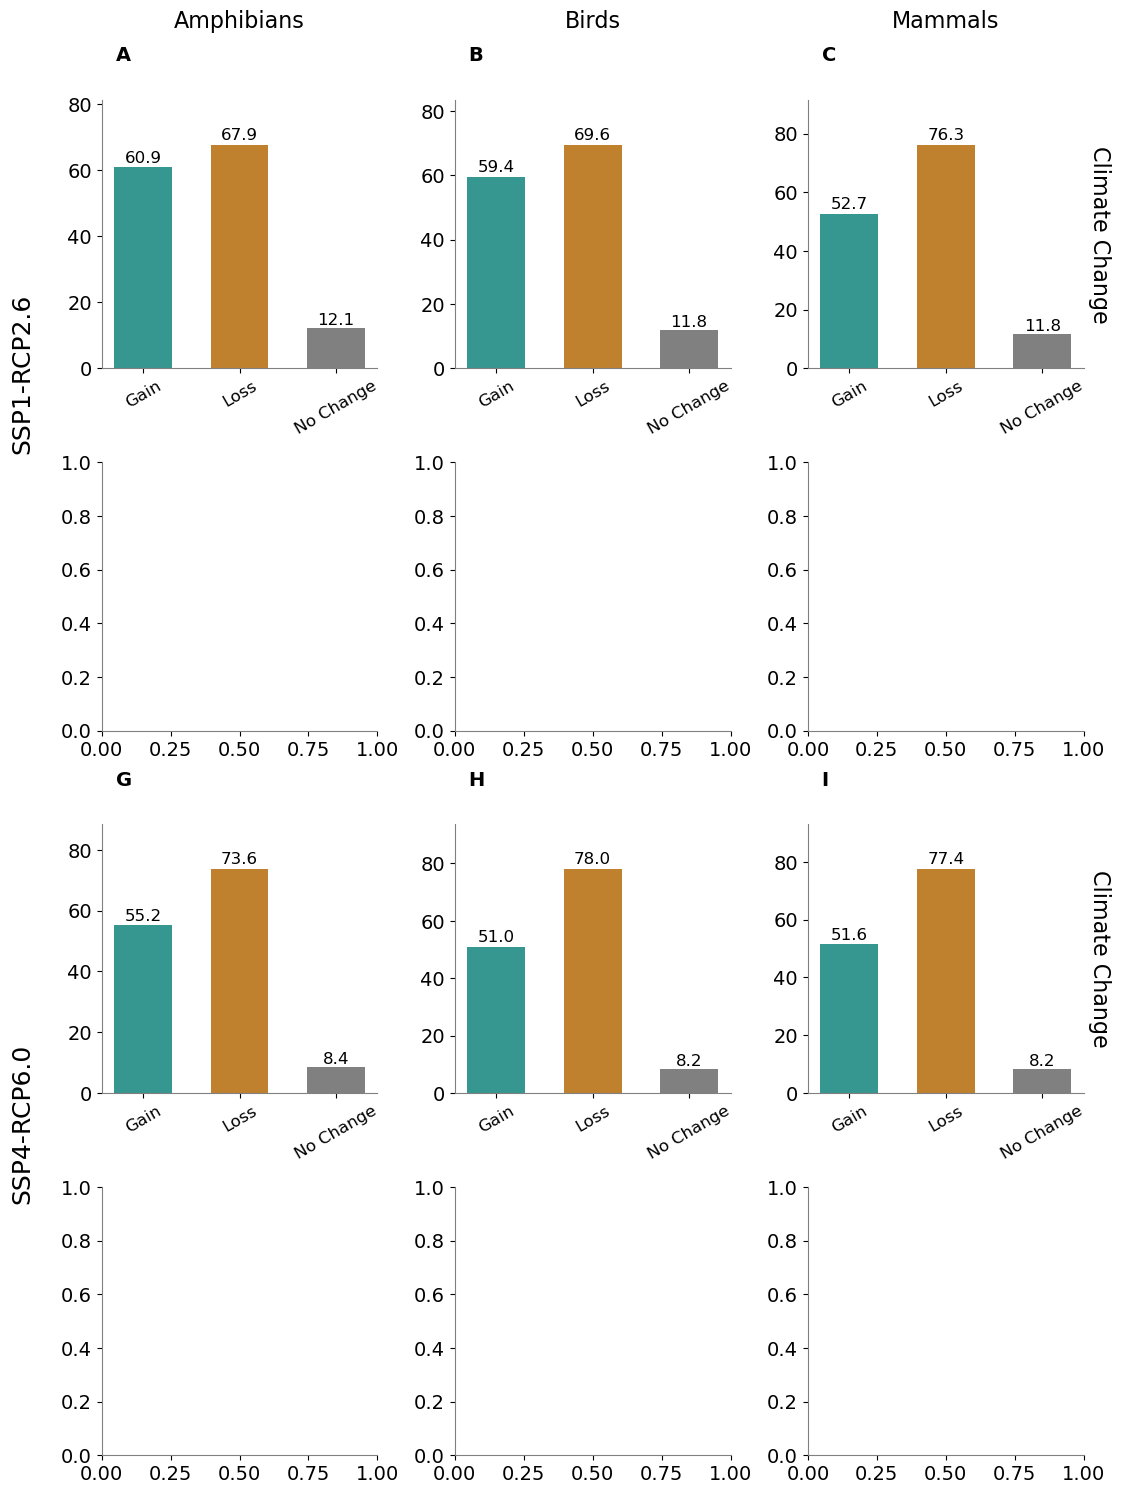

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# Colors and labels
colors = ['#35978f', '#bf812d', 'grey']
labels = ['Gain', 'Loss', 'No Change']
taxas = ["Amphibians", "Bird", "Mammals"]
taxa_indices = {"Mammals": "Mammals", "Bird": "Birds", "Amphibians": "Amphibians"}

scenarios = ["rcp26", "rcp60"]
num_scenarios = len(scenarios)
num_taxas = len(taxas)
num_rows = num_scenarios * 2
num_cols = num_taxas

subplot_labels = ['A', 'B','C','G','H','I']
subplot_labels_luc = ['D', 'E','F','J','K','L']

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 15))
label_index = 0
bar_width = 0.6

for j, scenario in enumerate(scenarios):
    for i, taxa in enumerate(taxas):
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa].where(land_mask>=0)
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa].where(land_mask>=0)
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa].where(land_mask>=0)
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa].where(land_mask>=0)

        EARTH_RADIUS = 6371000
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))
        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))/ 1e12

        gain_area_cc = xr.where(newvalue_future > newvalue_hist, cell_area, 0).sum().item()
        loss_area_cc = xr.where(newvalue_future < newvalue_hist, cell_area, 0).sum().item()
        no_change_area = xr.where((sumbin_future-newvalue_future) == (sumbin_hist-newvalue_hist), cell_area, 0).sum().item()

        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist - newvalue_hist
        gain_area_luc = xr.where(luc_fut > luc_hist, cell_area, 0).sum().item()
        loss_area_luc = xr.where(luc_fut < luc_hist, cell_area, 0).sum().item()

        # Climate Change Bar Plot
        ax_cc = axes[j*2, i]
        ax_cc.bar([0, 1, 2], [gain_area_cc, loss_area_cc, no_change_area],
                  color=colors, width=bar_width)
        ax_cc.set_xticks([0, 1, 2])
        ax_cc.set_xticklabels(labels, rotation=30, fontsize=12)
        ax_cc.set_ylim(0, max(gain_area_cc, loss_area_cc, no_change_area) * 1.2)

        if i == 2:
            ax_cc.set_ylabel('Climate Change', fontsize=16, rotation=-90)
            ax_cc.yaxis.set_label_position("right")
            ax_cc.yaxis.set_label_coords(1.1, 0.5)  # Moved to the right


        # Land Use Change Bar Plot
        ax_cc = axes[j*2, i]
        bars_cc = ax_cc.bar([0, 1, 2], [gain_area_cc, loss_area_cc, no_change_area],
                          color=colors, width=bar_width)
        ax_cc.set_xticks([0, 1, 2])
        ax_cc.set_xticklabels(labels, rotation=30, fontsize=12)
        ax_cc.set_ylim(0, max(gain_area_cc, loss_area_cc, no_change_area) * 1.2)
        
        for bar, value in zip(bars_cc, [gain_area_cc, loss_area_cc, no_change_area]):
            height = bar.get_height()
            ax_cc.text(bar.get_x() + bar.get_width() / 2, height + 0.01*height, f'{value:.1f}', 
                       ha='center', va='bottom', fontsize=12)
        
        if i == 2:
            ax_cc.set_ylabel('Climate Change', fontsize=16, rotation=-90)
            ax_cc.yaxis.set_label_position("right")
            ax_cc.yaxis.set_label_coords(1.1, 0.5)  # Moved to the right

        if j == 0:
            #ax_cc.set_title(taxa_indices[taxa], fontsize=16)
            ax_cc.text(0.5, 1.25, f'{taxa_indices[taxa]}', transform=ax_cc.transAxes,
               fontsize=16, ha='center', va='bottom')

        ax_cc.text(0.05, 1.2, subplot_labels[label_index], transform=ax_cc.transAxes,
                   fontsize=14, weight='semibold', va='top', ha='left')
        ax_luc.text(0.05, 1.2, subplot_labels_luc[label_index], transform=ax_luc.transAxes,
                    fontsize=14, weight='semibold', va='top', ha='left')

        label_index += 1

for ax in axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

# SSP/RCP labels
fig.text(-0.02, 0.75, 'SSP1-RCP2.6', ha='center', va='center', fontsize=18, rotation='vertical')
fig.text(-0.02, 0.25, 'SSP4-RCP6.0', ha='center', va='center', fontsize=18, rotation='vertical')

# Shared legend
#fig.legend(colors, labels=labels, loc='center right', bbox_to_anchor=(1.1, 0.5), frameon=False, fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 1])

# Optional: your own plot styling function
set_plot_param()


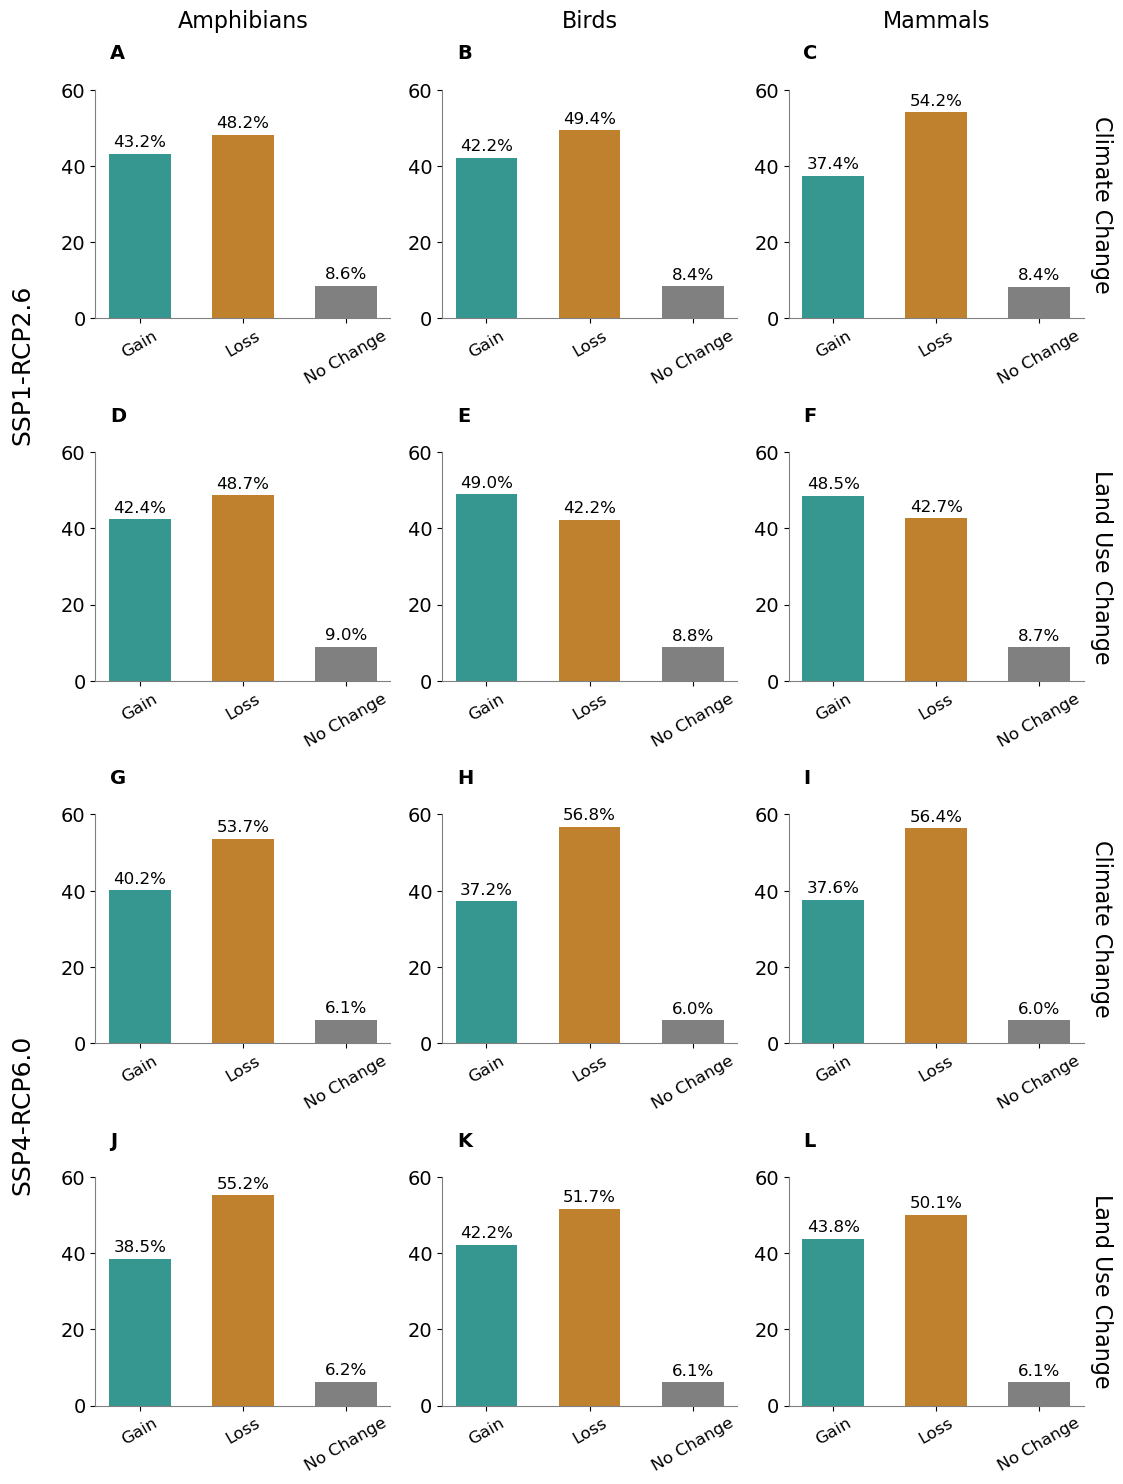

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr  # Assuming xarray is being used for data manipulation
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
# Assuming set_plot_param() is defined elsewhere

# Colors and labels
colors = ['#35978f', '#bf812d', 'grey']
labels = ['Gain', 'Loss', 'No Change']
taxas = ["Amphibians", "Bird", "Mammals"]

taxa_indices = {"Mammals": "Mammals", "Bird": "Birds", "Amphibians": "Amphibians"}
scenarios = ["rcp26", "rcp60"]
num_scenarios = len(scenarios)
num_taxas = len(taxas)
num_rows = num_scenarios * 2  # two rows per scenario: CC and LUC
num_cols = num_taxas
subplot_labels = ['A', 'B','C','G','H','I']
subplot_labels_luc = ['D', 'E','F','J','K','L']

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 15))  # Adjust height for labels
label_index = 0
bar_width = 0.6

for j, scenario in enumerate(scenarios):
    for i, taxa in enumerate(taxas):
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa].where(land_mask>=0)
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa].where(land_mask>=0)
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa].where(land_mask>=0)
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa].where(land_mask>=0)

        EARTH_RADIUS = 6371000
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))
        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat)) / 1e12

        gain_area_cc = xr.where(newvalue_future > newvalue_hist, cell_area, 0).sum().item()
        loss_area_cc = xr.where(newvalue_future < newvalue_hist, cell_area, 0).sum().item()
        no_change_area = xr.where((sumbin_future - newvalue_future) == (sumbin_hist - newvalue_hist), cell_area, 0).sum().item()

        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist - newvalue_hist
        gain_area_luc = xr.where(luc_fut > luc_hist, cell_area, 0).sum().item()
        loss_area_luc = xr.where(luc_fut < luc_hist, cell_area, 0).sum().item()

        # Calculate percentages for Climate Change
        total_cc = gain_area_cc + loss_area_cc + no_change_area
        perc_cc = [100 * gain_area_cc / total_cc,
                   100 * loss_area_cc / total_cc,
                   100 * no_change_area / total_cc]

        # Climate Change bar plot
        ax_cc = axes[j*2, i]
        bars_cc = ax_cc.bar([0, 1, 2], perc_cc, color=colors, width=bar_width)
        ax_cc.set_xticks([0, 1, 2])
        ax_cc.set_xticklabels(labels, rotation=30, fontsize=12)
        ax_cc.set_ylim(0, 60)

        # Add numbers on top of bars for Climate Change
        for bar, value in zip(bars_cc, perc_cc):
            height = bar.get_height()
            ax_cc.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{value:.1f}%',
                       ha='center', va='bottom', fontsize=12)

        if i == 2:
            ax_cc.set_ylabel('Climate Change', fontsize=16, rotation=-90)
            ax_cc.yaxis.set_label_position("right")
            ax_cc.yaxis.set_label_coords(1.1, 0.5)

        # Calculate percentages for Land Use Change
        total_luc = gain_area_luc + loss_area_luc + no_change_area
        perc_luc = [100 * gain_area_luc / total_luc,
                    100 * loss_area_luc / total_luc,
                    100 * no_change_area / total_luc]

        # Land Use Change bar plot
        ax_luc = axes[j*2 + 1, i]
        bars_luc = ax_luc.bar([0, 1, 2], perc_luc, color=colors, width=bar_width)
        ax_luc.set_xticks([0, 1, 2])
        ax_luc.set_xticklabels(labels, rotation=30, fontsize=12)
        ax_luc.set_ylim(0, 60)

        # Add numbers on top of bars for Land Use Change
        for bar, value in zip(bars_luc, perc_luc):
            height = bar.get_height()
            ax_luc.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{value:.1f}%',
                        ha='center', va='bottom', fontsize=12)

        if i == 2:
            ax_luc.set_ylabel('Land Use Change', fontsize=16, rotation=-90)
            ax_luc.yaxis.set_label_position("right")
            ax_luc.yaxis.set_label_coords(1.1, 0.5)

        if j == 0:
            ax_cc.text(0.5, 1.25, f'{taxa_indices[taxa]}', transform=ax_cc.transAxes,
                       fontsize=16, ha='center', va='bottom')

        ax_cc.text(0.05, 1.2, subplot_labels[label_index], transform=ax_cc.transAxes,
                   fontsize=14, weight='semibold', va='top', ha='left')
        ax_luc.text(0.05, 1.2, subplot_labels_luc[label_index], transform=ax_luc.transAxes,
                    fontsize=14, weight='semibold', va='top', ha='left')

        label_index += 1

for ax in axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

# SSP/RCP labels
fig.text(-0.02, 0.75, 'SSP1-RCP2.6', ha='center', va='center', fontsize=18, rotation='vertical')
fig.text(-0.02, 0.25, 'SSP4-RCP6.0', ha='center', va='center', fontsize=18, rotation='vertical')

plt.tight_layout(rect=[0, 0, 0.9, 1])

set_plot_param()


In [ ]:
warnings.filterwarnings('ignore', category=UserWarning)
# Assuming set_plot_param() is defined elsewhere
# set_plot_param()

# Example colors for the doughnut chart segments
colors =[ '#35978f', '#bf812d', 'grey']
labels = ['Gain', 'Loss', 'No Change']
taxas = ["Mammals", "Bird", "Amphibians"]
scenarios = ["rcp26", "rcp60"]  # Updated scenario names for clarity
num_scenarios = len(scenarios)
num_taxas = len(taxas)
num_rows = num_scenarios * 2  # Two rows per scenario: one for CC and one for LUC
num_cols = num_taxas  # One column per taxa

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12,12))  # Adjust figsize as needed

# Define the width of the doughnut. Smaller values = thicker doughnuts
doughnut_width = 0.1
base_thickness = 0.3  # Base thickness for doughnut charts
thickness_factor = 0.005  # Adjust this factor to control how much the thickness varies
# Define the maximum outer radius of the doughnut chart
max_outer_radius = 1.0
# Define the inner radius that will vary based on the value
min_inner_radius = 0.3  # Minimum inner radius when value is zero

base_radius = 1.5
for j, scenario in enumerate(scenarios):
    for i, taxa in enumerate(taxas):
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa].where(land_mask>=0)
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa].where(land_mask>=0)
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa].where(land_mask>=0)
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa].where(land_mask>=0)
        
        
        EARTH_RADIUS = 6371000  # Earth's radius in meters
        # Assuming 'newvalue_future' and others are xarray DataArrays with 'lat' and 'lon' dimensions
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))
        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))/ 1e12

        
        gain_area_cc = xr.where(newvalue_future > newvalue_hist, cell_area, 0).sum().item()  # Convert to km²
 
           
        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        
        gain_area_luc = xr.where(luc_fut > luc_hist, cell_area,0).sum().item()
        no_change_area = xr.where((sumbin_future-newvalue_future) == (sumbin_hist-newvalue_hist), cell_area, 0).sum().item()
        
        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        loss_area_cc = xr.where(newvalue_future < newvalue_hist, cell_area, 0).sum().item() # Convert to km²
        loss_area_luc = xr.where(luc_fut < luc_hist, cell_area,0).sum().item() 
        total_value_luc = sum([gain_area_luc, loss_area_luc, no_change_area])
        
        total_value_cc = gain_area_cc + loss_area_cc + no_change_area
        total_value_luc = gain_area_luc + loss_area_luc + no_change_area


        total_value_max = max(total_value_cc, total_value_luc)
        inner_radius_proportion_cc = (1 - (total_value_cc / total_value_max)) * (max_outer_radius - min_inner_radius) + min_inner_radius
        inner_radius_proportion_luc = (1 - (total_value_luc / total_value_max)) * (max_outer_radius - min_inner_radius) + min_inner_radius

        # Doughnut plots for Climate Change
        ax_cc = axes[j*2, i]
        ax_cc.pie([gain_area_cc, loss_area_cc, no_change_area], labels=labels, colors=colors, radius=max_outer_radius, startangle=90,
                  wedgeprops=dict(width=max_outer_radius - inner_radius_proportion_cc, edgecolor='w'))

        # Doughnut plots for Land Use Change
        ax_luc = axes[j*2 + 1, i]
        ax_luc.pie([gain_area_luc, loss_area_luc, no_change_area], labels=labels, colors=colors, radius=max_outer_radius, startangle=90,
                   wedgeprops=dict(width=max_outer_radius - inner_radius_proportion_luc, edgecolor='w'))


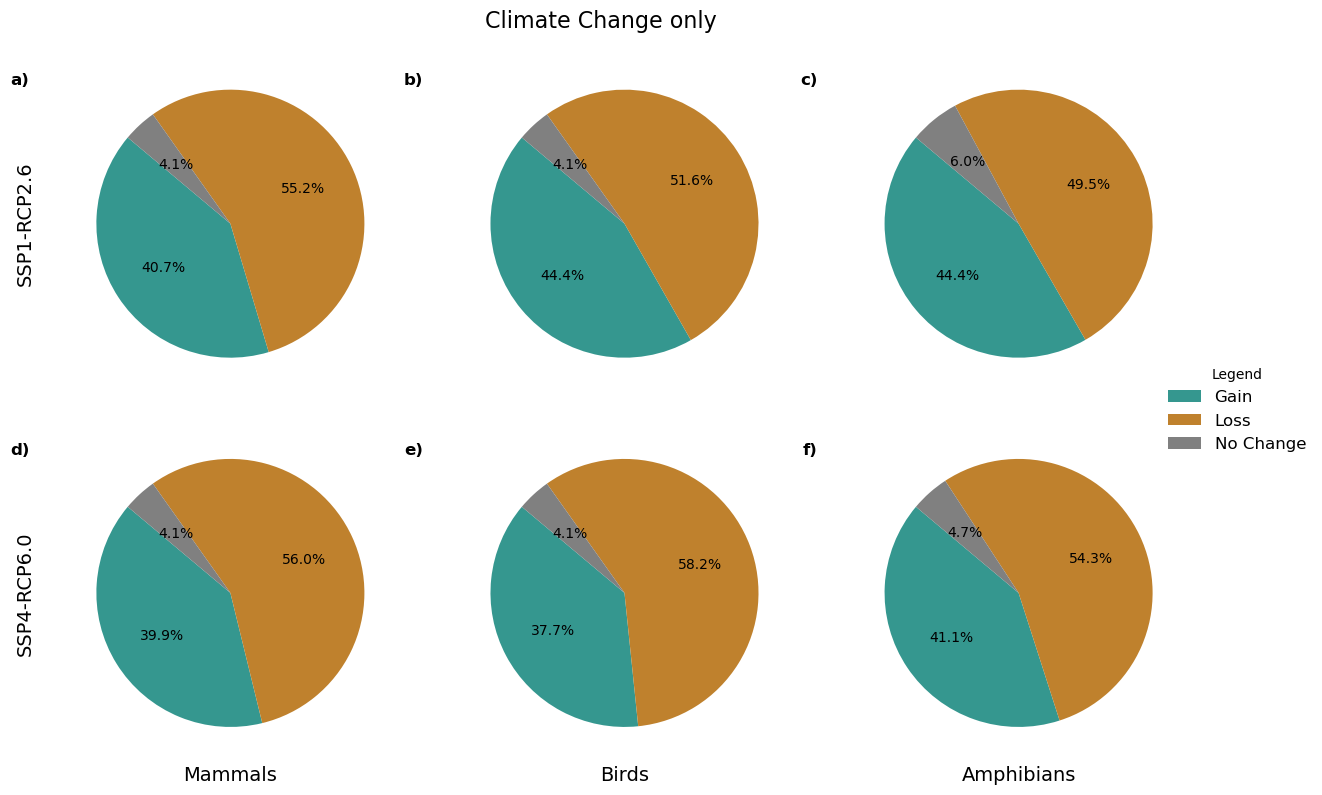

In [8]:
import matplotlib.pyplot as plt

# Example colors and labels for the pie chart segments
colors =[ '#35978f', '#bf812d', 'grey'] #one shade lighter  
labels = ['Gain', 'Loss', 'No Change']
subplot_labels = ['a)', 'b)','c)','d)','e)','f)']

# No need to calculate total_area here as it was done in each loop iteration

taxas = ["Mammals", "Bird", "Amphibians"]
scenarios = ["rcp26", "rcp60"]
scenario_indices = {"rcp26": 'SSP1-RCP2.6', "rcp60": 'SSP4-RCP6.0'}
taxa_indices = {"Mammals": "Mammals", "Bird": "Birds", "Amphibians": "Amphibians"}

num_scenarios = len(scenarios)
num_taxas = len(taxas)

fig, axes = plt.subplots(num_scenarios, num_taxas, figsize=(12, 8))  # Adjust figsize as needed
label_index = 0  # Initialize a counter for your subplot_labels

# Loop through scenarios and taxa to plot
for j, scenario in enumerate(scenarios):
    for i, taxa in enumerate(taxas):
        # Assuming the plotting code for pie charts is correctly implemented here
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa].where(land_mask>=0)
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa].where(land_mask>=0)
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa].where(land_mask>=0)
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa].where(land_mask>=0)
        
        
        EARTH_RADIUS = 6371000  # Earth's radius in meters
        # Assuming 'newvalue_future' and others are xarray DataArrays with 'lat' and 'lon' dimensions
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))
        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))/ 1e12

        
        gain_area_cc = xr.where(newvalue_future > newvalue_hist, cell_area, 0).sum().item()  # Convert to km²

           
        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        
        gain_area_luc = xr.where(luc_fut > luc_hist, cell_area,0).sum().item()
        no_change_area = xr.where((sumbin_future-newvalue_future) == (sumbin_hist-newvalue_hist), cell_area, 0).sum().item()
        
        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        loss_area_cc = xr.where(newvalue_future < newvalue_hist, cell_area, 0).sum().item() # Convert to km²
        loss_area_luc = xr.where(luc_fut < luc_hist, cell_area,0).sum().item() 
        
        
        portions = [gain_area_cc,
                    loss_area_cc ,
                    no_change_area  ]
        # Determine the correct axis for plotting
        ax = axes[j, i] if num_scenarios > 1 or num_taxas > 1 else axes
        


        # Add subplot label
        # Adjust the x and y coordinates as necessary to position the label correctly
        ax.text(-0.1, 0.95, subplot_labels[label_index], transform=ax.transAxes, fontsize=12, weight='bold', va='top', ha='right')

        label_index += 1  # Increment the counter

        

        # Plotting pie charts logic should be here

        # Set labels on the bottom row and leftmost column only
        if j == num_scenarios - 1:  # Bottom row
            ax.set_xlabel(taxa_indices[taxa], fontsize=14)
        if i == 0:  # Leftmost column
            ax.set_ylabel(scenario_indices[scenario], labelpad=20, fontsize=14)

        ax.pie(portions,  colors=colors, autopct='%1.1f%%', startangle=140)
        
# Adjust subplots to leave space for scenario labels on the left
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.85, top=0.9)
plt.tight_layout()
plt.suptitle('Climate Change only', fontsize=16, y=1)
fig.legend(labels, loc='center right', bbox_to_anchor=(1.1, 0.5), title='Legend', frameon=False)

        

plt.savefig("/storage/homefs/ch21o450/scripts/climate_Hari_etal_inprep/functions/figures/main_figures/Figure_4_cc.png")

In [7]:
diff = luc_fut-luc_hist


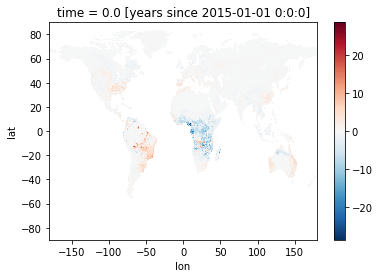

In [8]:
diff.plot()

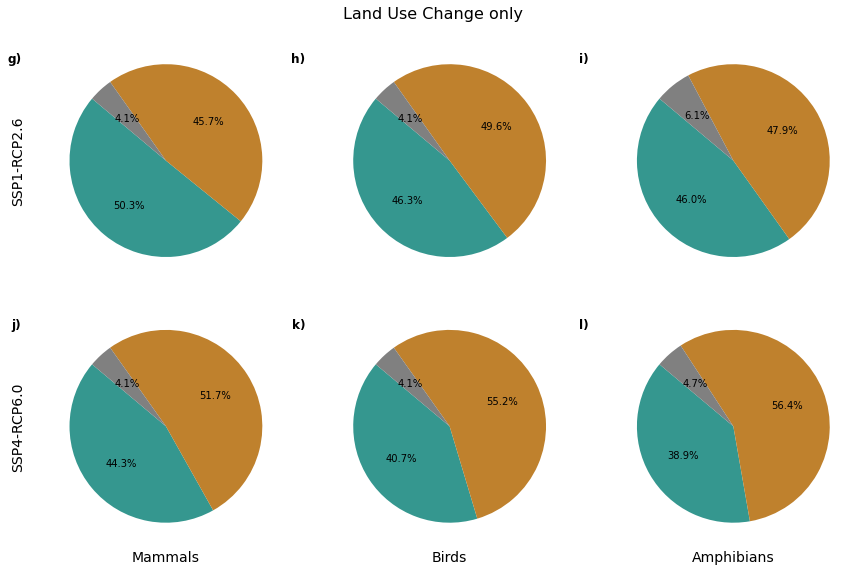

In [7]:
import matplotlib.pyplot as plt

# Example colors and labels for the pie chart segments
# colors = ['#2a6a99', '#c44e52', 'grey'] old colors
#colors =[ '#01665e', '#8c510a', 'grey'] 
colors =[ '#35978f', '#bf812d', 'grey'] #one shade lighter 

labels = ['Gain', 'Loss', 'No Change']

# No need to calculate total_area here as it was done in each loop iteration
subplot_labels = ['g)', 'h)','i)','j)','k)','l)']
taxas = ["Mammals", "Bird", "Amphibians"]
scenarios = ["rcp26", "rcp60"]
scenario_indices = {"rcp26": 'SSP1-RCP2.6', "rcp60": 'SSP4-RCP6.0'}
taxa_indices = {"Mammals": "Mammals", "Bird": "Birds", "Amphibians": "Amphibians"}

num_scenarios = len(scenarios)
num_taxas = len(taxas)
label_index = 0  # Initialize a counter for your subplot_labels
fig, axes = plt.subplots(num_scenarios, num_taxas, figsize=(12, 8))  # Adjust figsize as needed

# Loop through scenarios and taxa to plot
for j, scenario in enumerate(scenarios):
    for i, taxa in enumerate(taxas):
        # Assuming the plotting code for pie charts is correctly implemented here
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa].where(land_mask>=0)
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa].where(land_mask>=0)
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa].where(land_mask>=0)
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa].where(land_mask>=0)
        
        
        EARTH_RADIUS = 6371000  # Earth's radius in meters
        # Assuming 'newvalue_future' and others are xarray DataArrays with 'lat' and 'lon' dimensions
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))
        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))/ 1e12

        
        gain_area_cc = xr.where(newvalue_future > newvalue_hist, cell_area, 0).sum().item()  # Convert to km²

           
        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        
        gain_area_luc = xr.where(luc_fut > luc_hist, cell_area,0).sum().item()
        no_change_area = xr.where((sumbin_future-newvalue_future) == (sumbin_hist-newvalue_hist), cell_area, 0).sum().item()
        
        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        loss_area_cc = xr.where(newvalue_future < newvalue_hist, cell_area, 0).sum().item() # Convert to km²
        loss_area_luc = xr.where(luc_fut < luc_hist, cell_area,0).sum().item() 
        
        
        portions = [gain_area_luc,
                    loss_area_luc ,
                    no_change_area  ]
        # Determine the correct axis for plotting
        ax = axes[j, i] if num_scenarios > 1 or num_taxas > 1 else axes

        ax.text(-0.1, 0.95, subplot_labels[label_index], transform=ax.transAxes, fontsize=12, weight='bold', va='top', ha='right')

        label_index += 1  # Increment the counter

        
        # Set labels on the bottom row and leftmost column only
        if j == num_scenarios - 1:  # Bottom row
            ax.set_xlabel(taxa_indices[taxa],fontsize=14)
        if i == 0:  # Leftmost column
            ax.set_ylabel(scenario_indices[scenario], labelpad=20, fontsize=14)

        ax.pie(portions,  colors=colors, autopct='%1.1f%%', startangle=140)

# Adjust subplots to leave space for scenario labels on the left
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.85, top=0.9)
plt.tight_layout()
plt.suptitle('Land Use Change only', fontsize=16, y=1)
#fig.legend(labels, loc='center right', bbox_to_anchor=(1.1, 0.5), title='Legend', frameon=False)
plt.savefig("/storage/homefs/ch21o450/scripts/climate_Hari_etal_inprep/functions/figures/main_figures/Figure_4_luc.png")

/scratch/local/7542606/ipykernel_51082/2830620419.py:113: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_loss.set_xticklabels(taxa_labels)
/scratch/local/7542606/ipykernel_51082/2830620419.py:113: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_loss.set_xticklabels(taxa_labels)


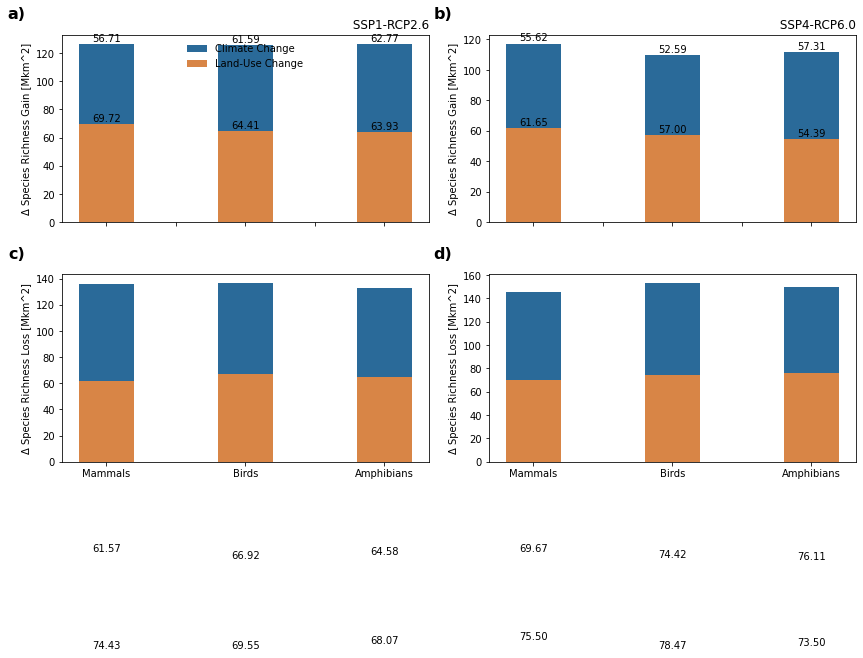

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid of subplots

# Set common parameters
bar_width = 0.4
x_positions = np.arange(len(taxas))
min_threshold = 1e-6
y_range_gain = [0, 30]
y_range_loss = [-30, 0]
subplot_labels = ['a)', 'b)','c)','d)']

scenario_indices={"rcp26": 'SSP1-RCP2.6', "rcp60": 'SSP4-RCP6.0'}
taxa_labels=  ["Mammals","Birds","Amphibians"] 
taxas=  ["Mammals","Bird","Amphibians"] 
color_change = "#2a6a99"
color_land_use_change = "#d88546"
# Plot for gain
for j, scenario in enumerate(scenarios):
    ax_gain = axes[0, j]
    std_dev_newvalue = []
    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]
        
        EARTH_RADIUS = 6371000  # Earth's radius in meters
        # Assuming 'newvalue_future' and others are xarray DataArrays with 'lat' and 'lon' dimensions
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))
        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))/ 1e12

        
        gain_area_cc = xr.where(newvalue_future > newvalue_hist, cell_area, 0).sum().item()  # Convert to km²

           
        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        
        gain_area_luc = xr.where(luc_fut > luc_hist, cell_area,0).sum().item()
        no_change_area = xr.where(sumbin_future == sumbin_hist, cell_area, 0).sum().item()
        bar_cc = ax_gain.bar(x_shift, gain_area_cc, bar_width, label='Climate Change' if i == 0 else "", color=color_change, bottom=gain_area_luc)
        bar_luc = ax_gain.bar(x_shift, gain_area_luc, bar_width, label='Land-Use Change' if i == 0 else "", color=color_land_use_change)

        # Adding numbers to the bars
        ax_gain.text(x_shift, gain_area_luc + gain_area_cc + 0.5, f'{gain_area_cc:.2f}', ha='center', va='bottom')
        if gain_area_luc > 0:  # Only show if there is a visible bar segment for land-use change
            ax_gain.text(x_shift, gain_area_luc + 0.5, f'{gain_area_luc:.2f}', ha='center', va='bottom')

    

    ax_gain.set_xticklabels([])
    ax_gain.text(-0.1, 1.15, subplot_labels[j], transform=ax_gain.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
    ax_gain.set_ylabel('Δ Species Richness Gain [Mkm^2]')
    ax_gain.set_title(f' {scenario_indices[scenario]}', loc='right')
    if j == 0:  # Add legend only to the first subplot
        ax_gain.legend(frameon=False, loc='upper center')



# Plot for loss
for j, scenario in enumerate(scenarios):
    ax_loss = axes[1, j]
    std_dev_newvalue = []
    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        
        
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa].where(land_mask>=0)
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa].where(land_mask>=0)
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa].where(land_mask>=0)
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa].where(land_mask>=0)

        

        # Assuming 'cell_area' is a DataArray with dimensions 'lat' and 'lon'
        # and a binary mask 'land_mask' where land=1 and ocean=0

        # Apply land mask to exclude oceanic areas from the analysis
        cell_area_land_only = cell_area.where(land_mask == 1)

        # Recalculate gain and loss areas using the masked area
        gain_area_cc = xr.where((newvalue_future > newvalue_hist) & (land_mask == 1), cell_area_land_only, 0).sum().item()
        loss_area_cc = xr.where((newvalue_future < newvalue_hist) & (land_mask == 1), cell_area_land_only, 0).sum().item()
        # Repeat for land-use change calculations

        
        EARTH_RADIUS = 6371000  # Earth's radius in meters
        # Assuming 'newvalue_future' and others are xarray DataArrays with 'lat' and 'lon' dimensions
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))
        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))/ 1e12

        

        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        loss_area_cc = xr.where(newvalue_future < newvalue_hist, cell_area, 0).sum().item() # Convert to km²
        loss_area_luc = xr.where(luc_fut < luc_hist, cell_area,0).sum().item() 
        


        bar_cc = ax_loss.bar(x_shift, loss_area_cc, bar_width, label='Climate Change' if i == 0 else "", color=color_change, bottom=loss_area_luc)
        bar_luc = ax_loss.bar(x_shift, loss_area_luc, bar_width, label='Land-Use Change' if i == 0 else "", color=color_land_use_change)

        # Adding numbers to the bars
        ax_loss.text(x_shift, -(loss_area_luc + loss_area_cc) - 0.5, f'{loss_area_cc:.2f}', ha='center', va='top')
        if loss_area_luc > 0:  # Only show if there is a visible bar segment for land-use change
            ax_loss.text(x_shift, -loss_area_luc - 0.5, f'{loss_area_luc:.2f}', ha='center', va='top')
    ax_loss.set_xticklabels(taxa_labels)
    ax_loss.set_xticks(x_positions)

    ax_loss.set_ylabel('Δ Species Richness Loss [Mkm^2]')
    ax_loss.text(-0.1, 1.15, subplot_labels[j+2], transform=ax_loss.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

plt.subplots_adjust(hspace=0.3)  # Adjust horizontal space if needed
plt.tight_layout()
plt.show()

total_area = gain_area_cc + abs(loss_area_cc) + gain_area_luc + abs(loss_area_luc) + no_change_area
no_change_area = xr.where(sumbin_future == sumbin_hist, cell_area, 0).sum().item()


